
<center>
    <img src="https://rockborne.com/wp-content/uploads/2021/07/LandingPage-Header-RED-CENTRE.jpg" width="900" alt="logo"  />
</center>

---
# Introduction to Pandas
---

---
#Prerequisites
---

Before beginning this workbook, please ensure you have the following:
- Completed the Python Basics Workbook.
- Have configured the config.py with the required DB credentials.
- Have the following data downloaded:
  - `customer.csv`
  - `payment.csv`
  - `address.csv`
  - `city.csv`
  - `country.csv`
  - Back-up data:
    - `orders_2017.csv`
    - `orders_2018.csv`
    - `orders_2019.csv`
    - `sales_reps.csv`

___
## SQL

The pandas.io.sql module provides a collection of query wrappers to both facilitate data retrieval and to reduce dependency on DB-specific API. Database abstraction is provided by SQLAlchemy if installed. In addition you will need a driver library for your database. Examples of such drivers are psycopg2 for PostgreSQL or pymysql for MySQL. For SQLite this is included in Python’s standard library by default.
The key functions are:

* read_sql_table(table_name, con[, schema, ...])
    * Read SQL database table into a DataFrame.
* read_sql_query(sql, con[, index_col, ...])
    * Read SQL query into a DataFrame.
* read_sql(sql, con[, index_col, ...])
    * Read SQL query or database table into a DataFrame.
* DataFrame.to_sql(name, con[, flavor, ...])
    * Write records stored in a DataFrame to a SQL database.
    
The most popular library for data analysist and scientists to establish connections to PostgreSQL is psycopg2.

This adapter seamlessly integrates Python and PostgreSQL, making it incredibly easy to work with these technologies in unison. It provides a set of Python modules that allow you to establish connections to PostgreSQL databases, execute SQL queries, and retrieve data easily. Psycopg2 adheres to Python’s database API specifications, ensuring a consistent and intuitive experience.

In [1]:
!pip install psycopg2

In [1]:
import psycopg2 as psycopg2
import pandas as pd

For this exercise, we will be extracting data from the superstore dataset detailed in the ERD below:

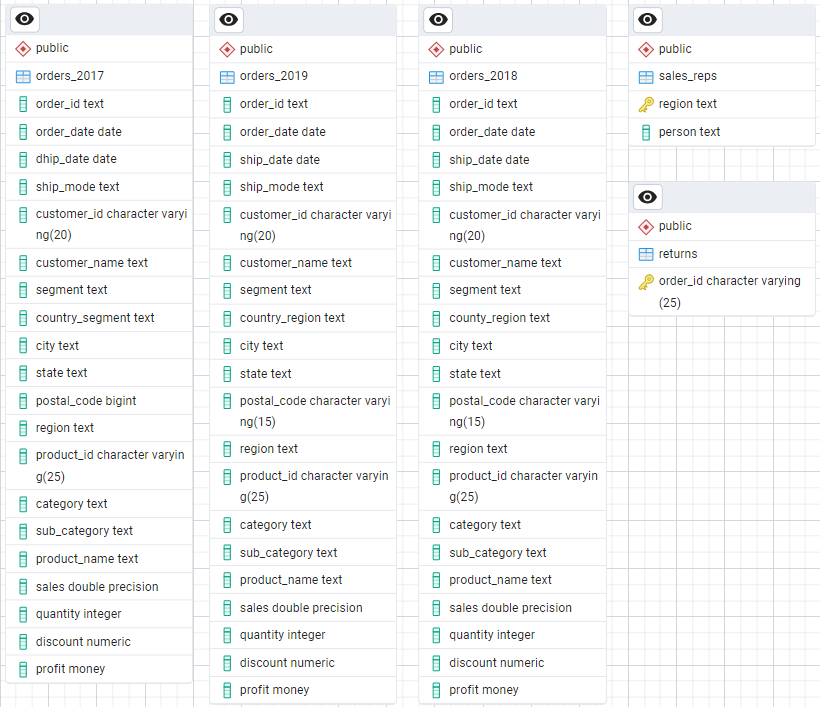

In this code we establish a connection with our database. The code is wrapped in a try/except block to handle exceptions or errors that may occur during the databse connection process.

In [2]:

import sys
import os

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

# Now you can import config.py
import config

# Use the config values
print(config.DB_USER)


coh_22


## Back up data

If connection to the database fails, run the cells below.



There are several reason why a connection to a SQL might fail when trying to retrieve data including:

- **Database Server Unreachable:** The database server may be down or not accessible due to network issues. This could be caused by server maintenance, incorrect host details, or network restrictions.
- **Insufficient Permissions:** Even if the connection is successful, the user might not have the necessary permissions to access the database or specific tables.
- **Firewall or Security Restrictions:** Some databases have firewall rules that restrict access from unknown IP addresses. If you're working remotely, the database may block your connection.
- **Connection Timeout:** If the server is experiencing heavy traffic or if the network is slow, the connection may time out before data is retrieved.



If the above code is not working, **add the files** sent to you to the Files section on the left and run the following to get the necessary datasets.

In [ ]:
#orders_2017 = pd.read_csv('../DataSources/orders_2017.csv')
#orders_2018 = pd.read_csv('../DataSources/orders_2018.csv')
#orders_2019 = pd.read_csv('../DataSources/orders_2019.csv')
#reps = pd.read_csv('../DataSources/sales_reps.csv')

## Now let's write our SQL query and transform the results into a dataframe

The cursor sends the query to the database.

The database processes the request and prepares the result.

`cursor.fetchall()` retrieves all the rows from the executed query as a list of tuples.

The list comprehension `[desc[0] for desc in cursor.description]` extracts column names from `cursor.description`. Without it, the DataFrame will have default column names (`0, 1, 2, ...`).

`pd.DataFrame()` converts the fetched data into a Pandas DataFrame, assigning column names to match the SQL table.

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_segment,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-$383.03
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2,$2.52
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.8,-$123.86
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.8,-$3.82
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0,$240.26


It is always good practice to close the cursor and connection object once your work gets completed to avoid database issues.

Use what you have learnt so far in the workbook to complete the following tasks:

In [ ]:
# *** Task ***
# What are the different data types in the dataset?

#--------------------------------------------------------------------------#


#--------------------------------------------------------------------------#

,0
order_id,object
order_date,object
dhip_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
country_segment,object
city,object
state,object


In [ ]:
# *** Task ***
# Select the first 10 rows and first 5 columns

#--------------------------------------------------------------------------#


#--------------------------------------------------------------------------#

,order_id,order_date,dhip_date,ship_mode,customer_id
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870
5,US-2017-150630,2017-09-17,2017-09-21,Standard Class,TB-21520
6,US-2017-150630,2017-09-17,2017-09-21,Standard Class,TB-21520
7,US-2017-150630,2017-09-17,2017-09-21,Standard Class,TB-21520
8,US-2017-150630,2017-09-17,2017-09-21,Standard Class,TB-21520
9,US-2017-150630,2017-09-17,2017-09-21,Standard Class,TB-21520


In [ ]:
# *** Task ***
# Select the order date and sales amount for the order with Order ID = "CA-2017-153549"

#--------------------------------------------------------------------------#



#--------------------------------------------------------------------------#

,order_date,sales
200,2017-03-29,1166.92


In [ ]:
# *** Task ***
# Without permanently changing the dataframe in the process, find which order had the highest sales.

#--------------------------------------------------------------------------#


#--------------------------------------------------------------------------#

,109
order_id,CA-2017-145352
order_date,2017-03-16
dhip_date,2017-03-22
ship_mode,Standard Class
customer_id,CM-12385
customer_name,Christopher Martinez
segment,Consumer
country_segment,United States
city,Atlanta
state,Georgia


In [ ]:
# *** Task ***
# Add a new column "Avg Item Price", calculated as Sales ÷ Quantity.

#--------------------------------------------------------------------------#



#--------------------------------------------------------------------------#

,order_id,order_date,dhip_date,ship_mode,customer_id,customer_name,segment,country_segment,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,Avg Item Price
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-$383.03,191.5155
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2,$2.52,11.1840
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.8,-$123.86,13.7620
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.8,-$3.82,0.8480
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,...,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0,$240.26,348.2100


In [ ]:
# *** Task ***
# Find the number of orders where the avg item price is less than 20.

#--------------------------------------------------------------------------#


#--------------------------------------------------------------------------#

1113

In [ ]:
# *** Task ***
# Delete the avg item price column.

#--------------------------------------------------------------------------#



#--------------------------------------------------------------------------#

,order_id,order_date,dhip_date,ship_mode,customer_id,customer_name,segment,country_segment,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-$383.03
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2,$2.52
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.8,-$123.86
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.8,-$3.82
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0,$240.26


Now let's continue extracting the rest of the tables from the database:

In [9]:
try:
    # Establishing a connection to the database
    connection = psycopg2.connect(**db_params)
    # Creating a cursor object to interact with the database
    cursor = connection.cursor()
    # Performing database operations here...
except (Exception, psycopg2.Error) as error:
    print(f"Error connecting to the database: {error}")

# *** TASK ***
# Fill in query to get the orders_2018 table
select_query = ""
cursor.execute(select_query)
orders_2018 = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

cursor.close()
connection.close()

ProgrammingError: can't execute an empty query

In [ ]:
orders_2018.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,county_region,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0,$41.91
1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0,$219.58
2,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0,$6.87
3,CA-2018-161389,2018-12-05,2018-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,$132.59
4,CA-2018-137330,2018-12-09,2018-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0,$5.06


In [ ]:
try:
    # Establishing a connection to the database
    connection = psycopg2.connect(**db_params)
    # Creating a cursor object to interact with the database
    cursor = connection.cursor()
    # Performing database operations here...
except (Exception, psycopg2.Error) as error:
    print(f"Error connecting to the database: {error}")

# *** TASK ***
# Fill in query to get the orders_2019 table
select_query = ""
cursor.execute(select_query)
orders_2019 = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

cursor.close()
connection.close()

In [ ]:
orders_2019.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2019-114412,2019-04-15,2019-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,$5.44
1,US-2019-156909,2019-07-16,2019-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-$1.02
2,CA-2019-107727,2019-10-19,2019-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,$9.95
3,CA-2019-120999,2019-09-10,2019-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,$16.56
4,CA-2019-139619,2019-09-19,2019-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,32935,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,$9.56


In [ ]:
try:
    # Establishing a connection to the database
    connection = psycopg2.connect(**db_params)
    # Creating a cursor object to interact with the database
    cursor = connection.cursor()
    # Performing database operations here...
except (Exception, psycopg2.Error) as error:
    print(f"Error connecting to the database: {error}")

# *** TASK ***
# Fill in query to get the sales_reps table
select_query = ""
cursor.execute(select_query)
reps = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

cursor.close()
connection.close()

In [ ]:
reps.head()

,region,person
0,West,Anna Andreadi
1,East,Chuck Magee
2,Central,Kelly Williams
3,South,Cassandra Brandow


---
<a name="anchorJoin" style="position:absolute;"></a>
# 12. Merging and Concatenating
---

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating.

Reference: https://realpython.com/pandas-merge-join-and-concat/

## Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

Notice that the columns **'dhip_date', 'country_segment', 'ship_date',** and **'county_region'** contain null values because they are not common to both the `orders_2017` and `orders_2018` tables. For a proper concatenation, column names must be consistent across tables.  

- The column **'dhip_date'** is a typo and should be corrected to **'ship_date'**.  
- Both **'country_segment'** and **'county_region'** represent the country of the order, so they should be standardised as **'country_region'** to ensure alignment with `orders_2019` when concatenating later.


Index(['order_id', 'order_date', 'dhip_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country_segment', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'county_region', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country_region', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

### How to Rename Columns in Pandas  

Renaming columns in pandas is straightforward using the `.rename()` method. This is useful for standardising column names across multiple DataFrames before merging or concatenating them.  


In [ ]:
# Rename columns


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-$383.03
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2,$2.52
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.8,-$123.86
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.8,-$3.82
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0,$240.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,US-2018-103674,2018-12-06,2018-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.3760,4,0.2,$4.68
2583,US-2018-103674,2018-12-06,2018-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.4720,14,0.2,$153.12
2584,US-2018-157728,2018-09-22,2018-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.5600,7,0,$16.71
2585,US-2018-157728,2018-09-22,2018-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.9800,2,0,$27.43


We can now concatenate all three at once now they all have the same column names:

## Merging

---

So far, we have only looked at one table at a time. If we want information from multiple tables we will need to join them together.

The syntax for merging two DataFrames is:
```
# Merge the left and right DataFrames
pd.merge(
  left,
  right,
  how = 'inner',
  left_on = 'left_join_field',
  right_on = 'right_join_field'
)
```

In this example, *left* is the name of the first DataFrames in the join (just like in a SQL join), *right* is the name of the second DataFrames in the join and *how* is the way we join them (can be 'left', 'right', 'inner', 'outer' and 'cross'). The *left_join_field* and *right_join_field* are the Series to merge on.

[The merge documentation can be found here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-$383.03
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2,$2.52
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.8,-$123.86
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.8,-$3.82
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0,$240.26


,region,person
0,West,Anna Andreadi
1,East,Chuck Magee
2,Central,Kelly Williams
3,South,Cassandra Brandow


In [ ]:
## Merge the DataFrames using the .merge() method


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,person
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-$383.03,Cassandra Brandow
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2,$2.52,Cassandra Brandow
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.8,-$123.86,Kelly Williams
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.8,-$3.82,Kelly Williams
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,...,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0,$240.26,Anna Andreadi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,CA-2019-163629,2019-11-17,2019-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,...,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0,$55.65,Cassandra Brandow
7997,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0,$15.63,Anna Andreadi
7998,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.2,$19.39,Anna Andreadi
7999,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0,$13.32,Anna Andreadi


<div class="alert alert-block alert-warning">
<b>Note</b>
This is the same as a SQL JOIN clause<br>
    
> <span style="color:purple;font-weight:bold">SELECT</span> *<br>
<span style="color:purple;font-weight:bold">FROM</span> orders<br>
<span style="color:purple;font-weight:bold">LEFT JOIN</span> reps
    <span style="color:purple;font-weight:bold">ON</span> orders.region = reps.region
    </div>

<a name="anchorAggregate" style="position:absolute;"></a>
<hr style="border:2px solid">

# 12. Aggregating Data  
<hr style="border-top:1px dashed">

To analyze aggregate data, such as a customer's total transactions, we can use the `.groupby()` method. This method allows us to group rows by specific attributes and apply aggregate functions to each group.

### How `groupby` Works:
Think of `groupby` in two steps:

- **Split:** Separate the DataFrame by a specific attribute (e.g., group by `Color`).
- **Combine:** Aggregate the grouped data using metrics such as `sum`, `count`, or `max`.




### Preparing the data

Data preparation is a crucial step in data analysis because raw data is often incomplete, inconsistent, or messy. Without proper preparation, analysis can lead to incorrect insights, misleading conclusions, or errors in models and reports.

We will delve deeper into this in the next workbook, but will perform the necessary steps below so that we can continue exploring the data.

#### Ensuring Consistent and Correct Data Types

When performing aggregations or calculations in Pandas, it is essential that **data types are consistent and appropriate** for each column. If data types are incorrect, mathematical operations may fail, or results may be inaccurate. For example, a column containing numerical values stored as strings (object type) cannot be used for calculations until it is converted to a numerical format.



In [ ]:
# Check data types to make sure we can do the aggregations


,0
order_id,object
order_date,object
ship_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
country_region,object
city,object
state,object


**What is the `object` Data Type in Pandas?**

The object data type in Pandas is a **flexible but inefficient** data type that typically stores text (strings) but can also include mixed data types within the same column. This can cause issues when trying to perform numerical operations.

The `discount` and `profit` columns appear as objects when they should be floats in order to do the aggregations. We must cast them to the correct types using `astype()`.

The `profit` column also requires stripping off the '$' and ',' in order to cast to a float so we have used th `replace()` function below to remove them.

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,person
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-$383.03,Cassandra Brandow
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2,$2.52,Cassandra Brandow
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.8,-$123.86,Kelly Williams
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.8,-$3.82,Kelly Williams
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,...,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0,$240.26,Anna Andreadi


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,person
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.03,Cassandra Brandow
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.52,Cassandra Brandow
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.86,Kelly Williams
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.82,Kelly Williams
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,...,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.26,Anna Andreadi


These columns also posed issues when aggregating because the datatypes weren't consistent across the tables we concatenated. To solve this we can just cast them all as their appropriate data types.

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,person
0,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.03,Cassandra Brandow
1,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.52,Cassandra Brandow
2,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.86,Kelly Williams
3,US-2017-118983,2017-11-22,2017-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.82,Kelly Williams
4,CA-2017-106320,2017-09-25,2017-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,...,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.26,Anna Andreadi


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        8001 non-null   object 
 1   order_date      8001 non-null   object 
 2   ship_date       8001 non-null   object 
 3   ship_mode       8001 non-null   object 
 4   customer_id     8001 non-null   object 
 5   customer_name   8001 non-null   object 
 6   segment         8001 non-null   object 
 7   country_region  8001 non-null   object 
 8   city            8001 non-null   object 
 9   state           8001 non-null   object 
 10  postal_code     8001 non-null   object 
 11  region          8001 non-null   object 
 12  product_id      8001 non-null   object 
 13  category        8001 non-null   object 
 14  sub_category    8001 non-null   object 
 15  product_name    8001 non-null   object 
 16  sales           8001 non-null   float64
 17  quantity        8001 non-null   i

## Syntax for Aggregating Data
To group data and apply aggregation:

```python
# Aggregate the DataFrame by group
DataFrame.groupby('group')

```

We can also apply aggregation functions directly to the grouped data. For example, to calculate the sum of each group:

```python
# Aggregate the DataFrame by group and calculate the sum
DataFrame.groupby('group').sum()

```


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,state,postal_code,region,product_id,sub_category,product_name,sales,quantity,discount,profit,person
category,,,,,,,,,,,,,,,,,,,,
Furniture,US-2017-108966CA-2017-106320US-2017-150630US-2...,2017-10-112017-09-252017-09-172017-09-172017-1...,2017-10-182017-09-302017-09-212017-09-212017-1...,Standard ClassStandard ClassStandard ClassStan...,SO-20335EB-13870TB-21520TB-21520SN-20710SN-207...,Sean O'DonnellEmily BurnsTracy BlumsteinTracy ...,ConsumerConsumerConsumerConsumerHome OfficeHom...,United StatesUnited StatesUnited StatesUnited ...,Fort LauderdaleOremPhiladelphiaPhiladelphiaHou...,FloridaUtahPennsylvaniaPennsylvaniaTexasTexasI...,33311.084057.019140.019140.077041.077041.04715...,SouthWestEastEastCentralCentralCentralCentralW...,FUR-TA-10000577FUR-TA-10000577FUR-BO-10004834F...,TablesTablesBookcasesFurnishingsBookcasesChair...,Bretford CR4500 Series Slim Rectangular TableB...,584806.9422,6405,292.23,12993.54,Cassandra BrandowAnna AndreadiChuck MageeChuck...
Office Supplies,US-2017-108966US-2017-118983US-2017-118983US-2...,2017-10-112017-11-222017-11-222017-09-172017-0...,2017-10-182017-11-262017-11-262017-09-212017-0...,Standard ClassStandard ClassStandard ClassStan...,SO-20335HP-14815HP-14815TB-21520TB-21520TB-215...,Sean O'DonnellHarold PawlanHarold PawlanTracy ...,ConsumerHome OfficeHome OfficeConsumerConsumer...,United StatesUnited StatesUnited StatesUnited ...,Fort LauderdaleFort WorthFort WorthPhiladelphi...,FloridaTexasTexasPennsylvaniaPennsylvaniaPenns...,33311.076106.076106.019140.019140.019140.01914...,SouthCentralCentralEastEastEastEastEastCentral...,OFF-ST-10000760OFF-AP-10002311OFF-BI-10000756O...,StorageAppliancesBindersBindersEnvelopesArtBin...,Eldon Fold 'N Roll Cart SystemHolmes Replaceme...,567270.6200,18337,757.50,99897.48,Cassandra BrandowKelly WilliamsKelly WilliamsC...
Technology,CA-2017-117415CA-2017-135545US-2017-156867CA-2...,2017-12-272017-11-242017-11-132017-10-152017-1...,2017-12-312017-11-302017-11-172017-10-202017-1...,Standard ClassStandard ClassStandard ClassStan...,SN-20710KM-16720LC-16870PA-19060EM-13960MP-174...,Steve NguyenKunst MillerLena CacioppoPete Arms...,Home OfficeConsumerConsumerHome OfficeConsumer...,United StatesUnited StatesUnited StatesUnited ...,HoustonLos AngelesAuroraOrland ParkPhiladelphi...,TexasCaliforniaColoradoIllinoisPennsylvaniaNew...,77041.090004.080013.060462.019134.010035.07522...,CentralWestWestCentralEastEastCentralEastEastE...,TEC-PH-10000486TEC-AC-10004633TEC-AC-10001552T...,PhonesAccessoriesAccessoriesAccessoriesAccesso...,Plantronics HL10 Handset LifterVerbatim 25 GB ...,660875.8000,5550,195.90,123962.71,Kelly WilliamsAnna AndreadiAnna AndreadiKelly ...


### What Happens to String Columns?
If the DataFrame contains string columns (e.g., `rep_name` or `region`), Pandas will **concatenate** them within each group instead of performing a numerical sum.

To see only the numerical data, we can do the following code:

,sales,quantity,discount,profit
category,,,,
Furniture,584806.9422,6405,292.23,12993.54
Office Supplies,567270.6200,18337,757.50,99897.48
Technology,660875.8000,5550,195.90,123962.71


We can also do this another way by filtering the dataframe first then applying the aggregation.

,sales,quantity,discount,profit
category,,,,
Furniture,584806.9422,6405,292.23,12993.54
Office Supplies,567270.6200,18337,757.50,99897.48
Technology,660875.8000,5550,195.90,123962.71


<div class="alert alert-block alert-warning">
<b>Note</b>
This is the same as a SQL GROUP BY clause<br>
    
> <span style="color:purple;font-weight:bold">SELECT</span> category, <span style="color:purple;font-weight:bold">SUM</span>(sales), SUM(quantity), SUM(discount), SUM(profit)<br>
<span style="color:purple;font-weight:bold">FROM</span> order_reps<br>
<span style="color:purple;font-weight:bold">GROUP BY</span> category
    </div>

We can find the customers who have spent the most by ordering them:

,sales
customer_id,
TC-20980,18429.900
RB-19360,15117.339
TA-21385,13807.770
AB-10105,13365.911
CC-12370,12129.072
SE-20110,11938.708
CJ-12010,11164.974
HL-15040,10979.108
TS-21370,10639.149


In [ ]:
# ** Task  **
# Find the sales rep who has the highest average sales

# --------------------------------------------------- #


# --------------------------------------------------- #


,sales
person,
Chuck Magee,235.993472
Anna Andreadi,227.212743
Cassandra Brandow,226.495721
Kelly Williams,214.002007


In [ ]:
# ** Task  **
# Which region generated the highest total profit across all three years (2017-2019)?

# --------------------------------------------------- #


# --------------------------------------------------- #

,profit
region,
West,88353.05
East,74463.26
Central,39166.88
South,34870.54


In [ ]:
# ** Task  **
# Which day generated the highest sales?

# --------------------------------------------------- #


# --------------------------------------------------- #

,sales
ship_date,
2018-10-09,19413.7120
2019-10-24,17753.4932
2019-03-25,15335.8140
2019-09-26,14751.7350
2019-11-22,14415.0740
...,...
2017-06-26,4.9600
2018-10-10,4.9280
2017-10-29,3.5920


## Applying Different Aggregation Methods to Each Column

In the example above, whilst it may have value to see the sum of sales, quantity, and profit, it doesn't make much sense to see the sum of the discount applied.

If you need to apply different aggregation functions to each column, you can use the `agg()` method. This allows you to specify which aggregation function to apply to each column individually.

Here’s an example:

```python
# Aggregate the DataFrame by group and apply different aggregation methods
DataFrame.groupby('group').agg({
  'Column1': 'sum',   # Sum of Column1
  'Column2': 'mean',  # Mean of Column2
  'Column3': 'max'    # Max of Column3
})

```

In this example:

- `group` is the column by which the data is grouped.
- `sum`, `mean`, and `max` are the aggregation functions applied to `Column1`, `Column2`, and `Column3` respectively.

For further details, check the [groupby documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [aggregation Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

,sales,quantity,discount,profit
category,,,,
Furniture,584806.9422,6405,0.171900,12993.54
Office Supplies,567270.6200,18337,0.157517,99897.48
Technology,660875.8000,5550,0.131300,123962.71


## Grouping by Multiple Columns in Pandas

If we want to analyse the data in more detail, we can **group by multiple columns** instead of just one. This allows us to see how different categories interact with each other.

For example, instead of grouping only by `category`, we could group by both `"category"` and `sub_category` to gain more insights.


sales  quantity  discount    profit
category        sub_category                                           
Furniture       Bookcases      94843.3187       715  0.212199  -3126.39
                Chairs        251207.5270      1816  0.169057  19635.11
                Furnishings    77878.9300      2903  0.135576  11086.34
                Tables        160877.1665       971  0.259677 -14601.52
Office Supplies Appliances     92218.5360      1415  0.167024  15678.57
                Art            21060.8100      2387  0.075316   5121.11
                Binders       159924.4680      4885  0.371452  25481.91
                Envelopes      12620.6520       700  0.074000   5468.65
                Fasteners       2362.9520       713  0.075449    770.98
                Labels          9644.9180      1074  0.069444   4260.22
                Paper          63644.2500      4161  0.073108  27682.38
                Storage       173514.5660      2485  0.075037  17112.73
                Supplies       32279.4680       517  0.078667  -1679.07
Technology      Accessories   142366.0460      2396  0.078469  35534.07
                Copiers       138678.2480       205  0.151724  52704.93
                Machines      127215.2580       344  0.300000   3015.57
                Phones        252616.2480      2605  0.154875  32708.14

In [ ]:
# ** Task **
# Use a groupby() to answer the following question:
# How do sales and profit vary across different regions within each product category?

# ---------------------------------------------------------------------------- #


# ---------------------------------------------------------------------------- #

sales
category        region              
Technology      East     219495.2520
                West     207038.1010
Furniture       West     202530.2955
Office Supplies East     169547.0660
                West     168006.3950
Furniture       East     161058.4650
Technology      Central  136489.5020
Furniture       Central  130887.5002
Office Supplies Central  130024.7240
                South     99692.4350
Technology      South     97852.9450
Furniture       South     90330.6815

In [ ]:
# ** Task **
# How does the performance of different shipping modes vary by region?

# ---------------------------------------------------------------------------- #


# ---------------------------------------------------------------------------- #

region   ship_mode     
East     Standard Class    326287.4020
West     Standard Class    320910.5365
Central  Standard Class    250337.6034
South    Standard Class    155058.8815
West     First Class       108803.9340
         Second Class      108472.2970
East     First Class        98646.2350
         Second Class       91624.3670
Central  Second Class       83026.2094
South    Second Class       74683.9160
Central  First Class        44488.7714
South    First Class        39720.2180
West     Same Day           39388.0240
East     Same Day           33542.7790
Central  Same Day           19549.1420
South    Same Day           18413.0460
Name: sales, dtype: float64

In [ ]:
# ** Task **
# How do sales perform across different customer segments and what are the min, max, and avg discounts that are given to each segment?

# ---------------------------------------------------------------------------- #




# ---------------------------------------------------------------------------- #

sales discount               
                     sum      min  max      mean
segment                                         
Consumer     895304.5324      0.0  0.8  0.154183
Corporate    577711.4931      0.0  0.8  0.160930
Home Office  339937.3367      0.0  0.8  0.151298

## Column aggregations

We can also look at column aggregations:

In [ ]:
# sum of sales


1812953.3621999999

In [ ]:
# average profit


29.60301587301587

In [ ]:
# min and max quantity


(1, 14)

In [ ]:
## All stats from the dataframe


,sales,quantity,discount,profit
count,8001.000000,8001.000000,8001.000000,8001.000000
mean,226.590846,3.786027,0.155684,29.603016
std,586.147708,2.220970,0.206644,242.262067
min,0.444000,1.000000,0.000000,-6599.980000
25%,17.480000,2.000000,0.000000,1.750000
50%,54.960000,3.000000,0.200000,8.710000
75%,208.160000,5.000000,0.200000,29.670000
max,17499.950000,14.000000,0.800000,8399.980000


# Export the data

### Export to CSV

Now that we have the data in the shape that we want, we can use *to_csv* to write the data to a csv file.



### Excel spreadsheet

We can also use ``to_excel`` to write the data to an excel file.

[Here is the documentation for to_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel)

<a name="anchorReading" style="position:absolute;"></a>
<hr style="border:2px solid">

# 13. Further Reading
<hr style="border-top:1px dashed">

### Tutorials
- [Automate the Boring Stuff with Python](https://automatetheboringstuff.com/) is an online (and paper!) book with basic Python tutorials and inspiration on what to do with Python.
- [Towards Data Science](https://towardsdatascience.com/) has articles about data science and data science tools, many of which rely on Python.
- [stack**overflow**](https://stackoverflow.com/questions/tagged/python) is a question and answer site for programming questions.
- [scipy lectures](http://scipy-lectures.org/) are a tutorial for using Python in Scientific computing, including data analysis

### Pandas information
- [Pandas cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Pandas comparison with SQL](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)
- On Aptem, in the ***Python Videos*** component of the Learning plan overview, there is the ***Corndel Pandas Methods.zip***
